In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from SHDataset import SHDataset
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from metrics import *

In [3]:
dataset = SHDataset(noise=False, dataset_dir='./dataset/')

In [4]:
G1,T1,G2,T2 = dataset.read_snapshots(0)

In [5]:
bbox = (52.355, 52.365, 4.860, 4.900)
G1,T1,G2,T2 = filter_bbox_snapshots(G1,T1,G2,T2,bbox)

### Visualizing Maps + Trajectories & Changes

#### Visualizing Maps + Trajectories

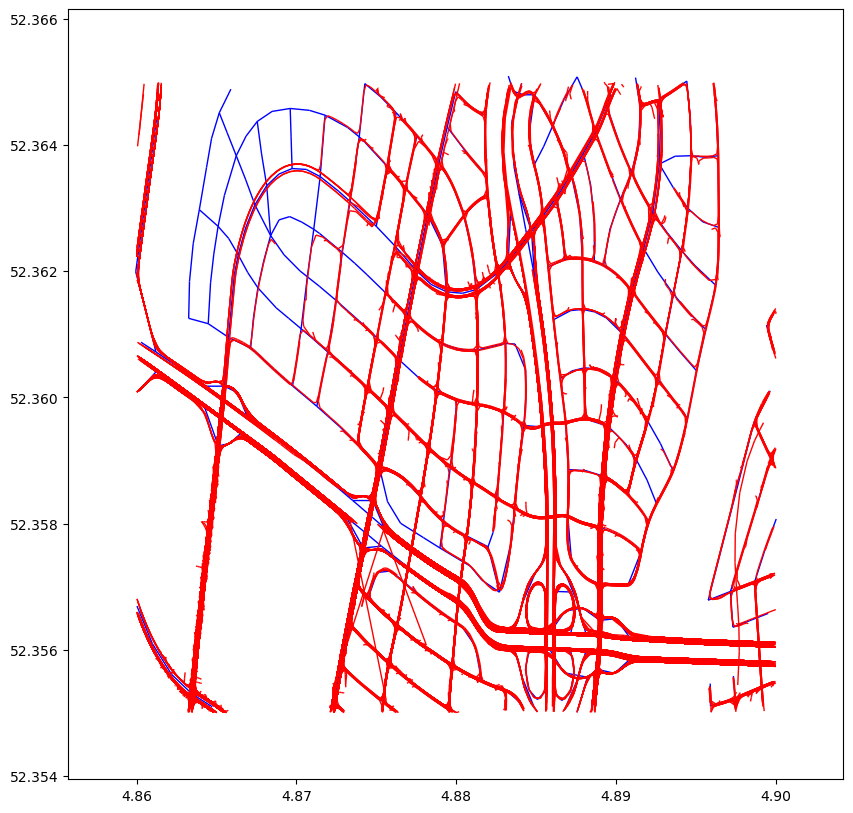

In [6]:
plot_graph(snapshot_to_nxgraph(G1,T2['T']), figsize=(10,10))

#### Visualizing Changes

In [7]:
G1_d, G12_d, G2_d, G21_d = compare_snapshots(G1,G2)

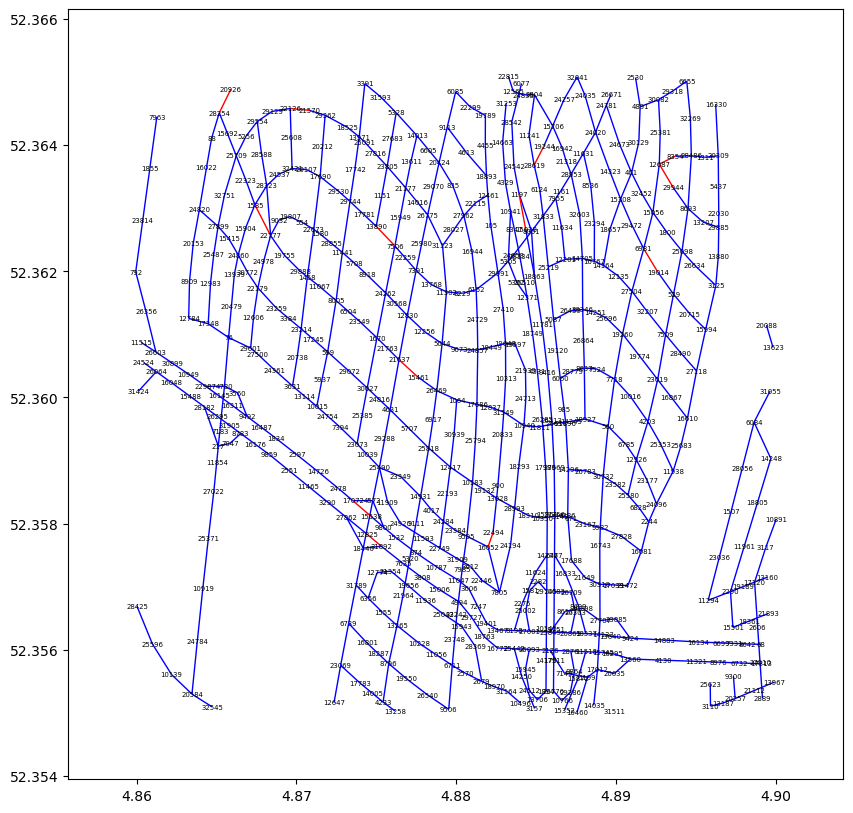

In [8]:
plot_graph(G12_d, figsize=(10,10), show_labels=True)

### Change Detectors

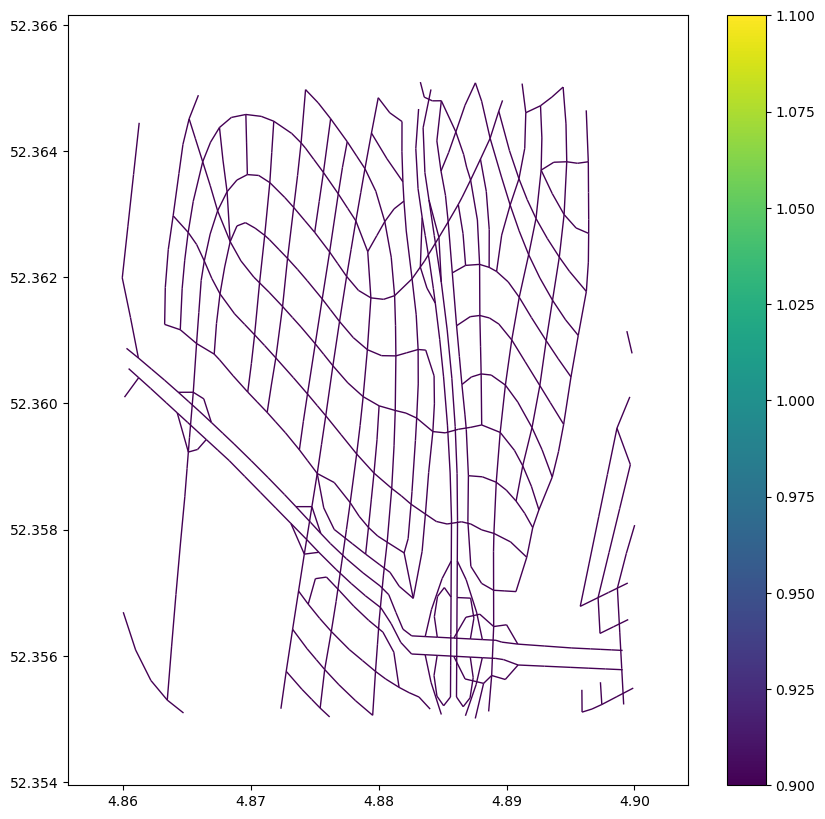

In [9]:
from models.always_true import AlwaysTrueDetector

alwaystrue_det = AlwaysTrueDetector(G1)
G2_pred_true = alwaystrue_det.forward(T2)
plot_graph(G2_pred_true, use_weights=True, figsize=(10,10))

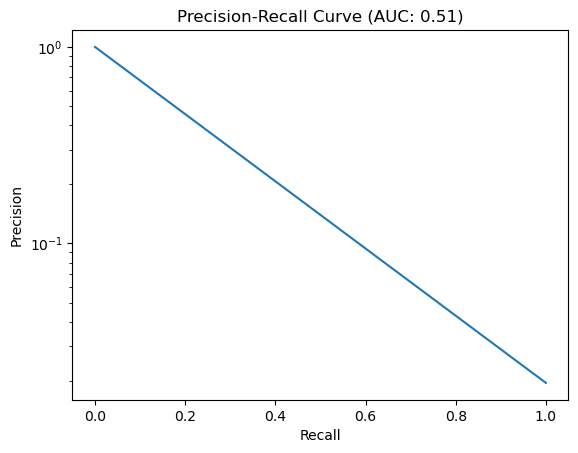

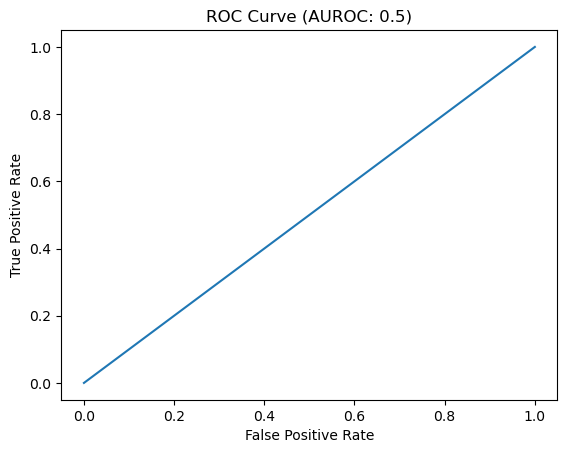

In [10]:
from metrics import *

scores_true = predicted_labels(G2_pred_true)
p_true, r_true, ts_true, pr_auc_true = PRCurve(groundtruth_labels(G1, G2), scores_true, norm=False)
tpr_true, fpr_true, auroc_true = ROCCurve(groundtruth_labels(G1, G2), scores_true)

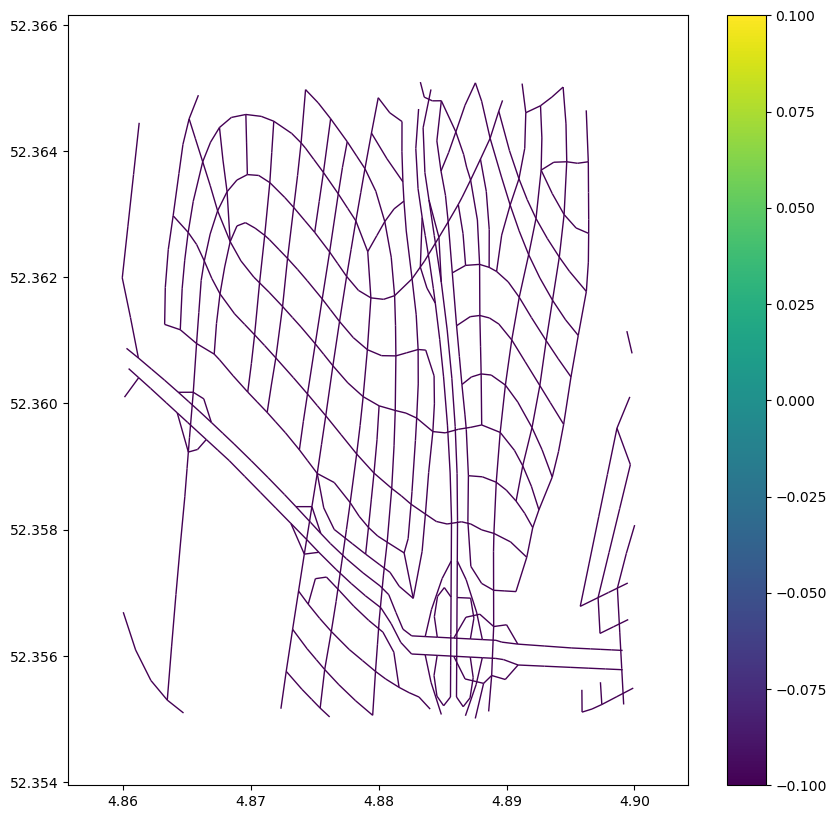

In [11]:
from models.always_false import AlwaysFalseDetector

alwaysfalse_det = AlwaysFalseDetector(G1)
G2_pred_false = alwaysfalse_det.forward(T2)
plot_graph(G2_pred_false, use_weights=True, figsize=(10,10))

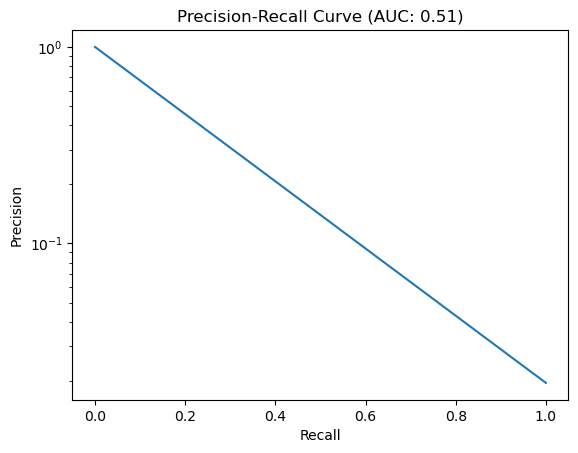

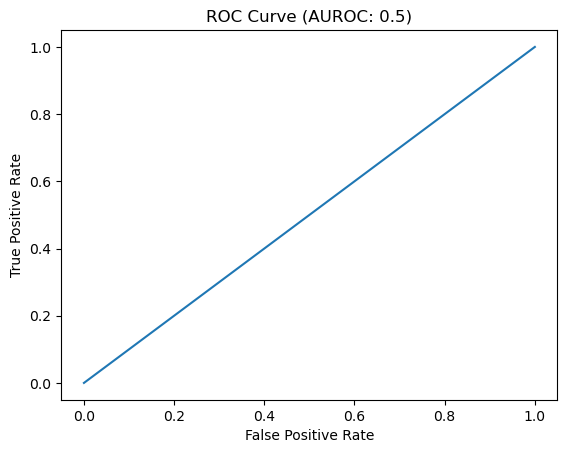

In [12]:
scores_false = predicted_labels(G2_pred_false)
p_false, r_false, ts_false, pr_auc_false = PRCurve(groundtruth_labels(G1, G2), scores_false)
tpr_false, fpr_false, auroc_false = ROCCurve(groundtruth_labels(G1, G2), scores_false)

#### Random Change Detector

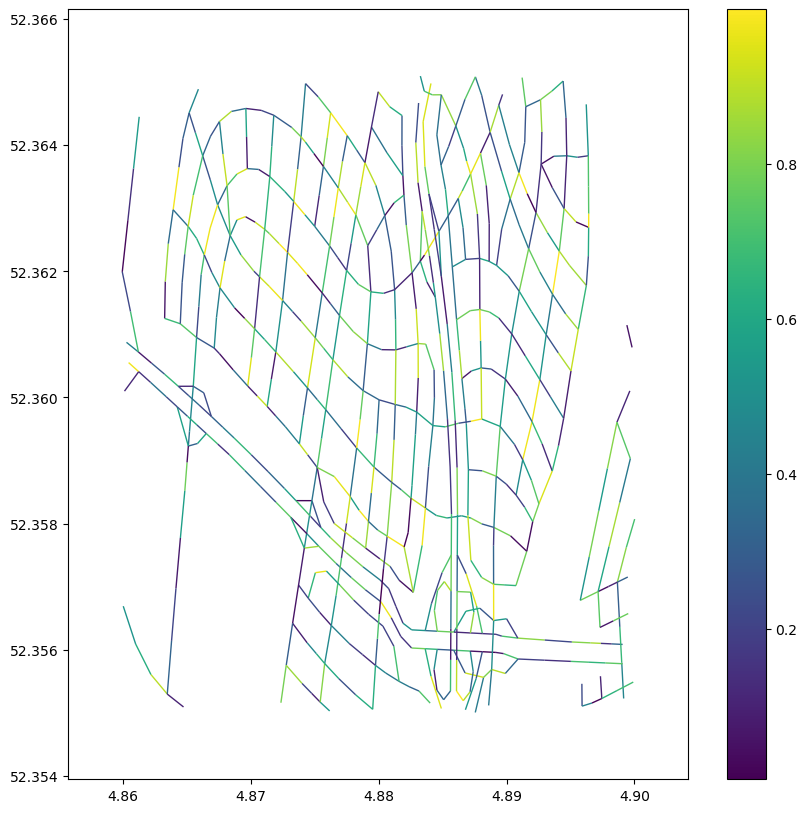

In [13]:
from models.random import RandomDetector

random_det = RandomDetector(G1)
G2_pred_rand = random_det.forward(T2)
plot_graph(G2_pred_rand, use_weights=True, figsize=(10,10))

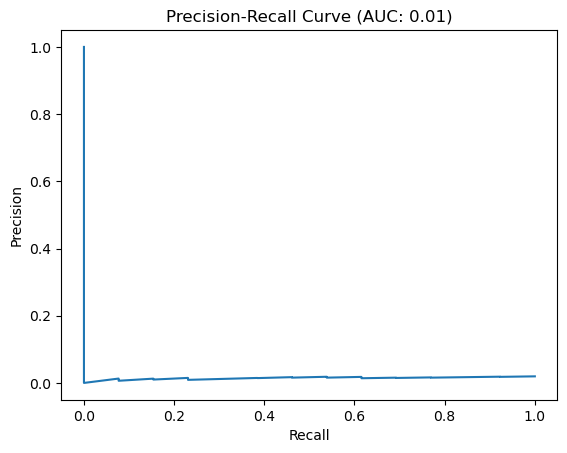

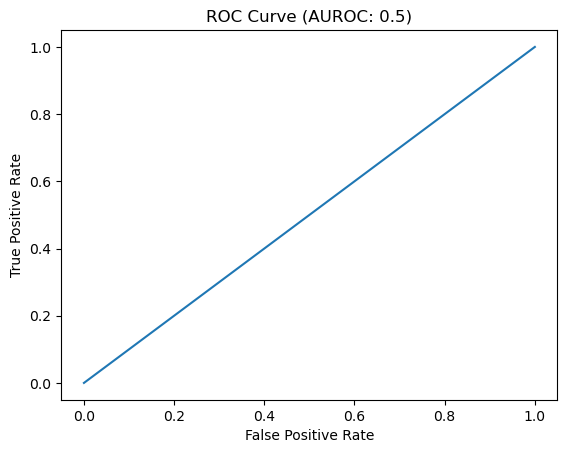

In [14]:
scores_rand = predicted_labels(G2_pred_rand)
p_rand, r_rand, ts_rand, pr_auc_rand = PRCurve(groundtruth_labels(G1, G2), scores_rand, log_scale=False)
tpr_rand, fpr_rand, auroc_rand = ROCCurve(groundtruth_labels(G1, G2), scores_false)

In [15]:
# edges, edge_weights = zip(*nx.get_edge_attributes(G2_pred, 'weight').items())

# w = ((t := (edge_weights - np.min(edge_weights)))/t.max() +1e-7)
# #w[w==0] = np.nan
# #w = np.exp(w)
# #w = (t := w - w.min())/t.max()
# w = w.tolist()

# class cm_(plt.cm.viridis.__class__):
#     def __call__(self, v):
#         if v == 0:
#             return (1, 0, 0, 1)
#         return super().__call__(1 - v)

# cm = cm_(plt.cm.viridis.colors)

# node_lats = nx.get_node_attributes(G2_pred, 'lat')
# node_lons = nx.get_node_attributes(G2_pred, 'lon')
# node_pos = {node: (node_lons[node], node_lats[node]) for node in nodes}
# nx.draw_networkx_edges(G2_pred, node_pos, width=1.0, edge_color=w, edge_cmap=cm, ax=plt.subplots(figsize=(30,30))[1])
T2['T'][:10]

[[{'lat': 52.364903907725036,
   'lon': 4.861350262932916,
   'speed': 7.978289,
   'x': -0.1240439,
   'y': 0.001873738,
   'z': -0.9922751,
   'heading': 187.12555716712092,
   'timestamp': '11/10/2076 2:09:58 AM',
   'gt_segment': 0,
   'path_id': 0,
   'pathpos_idx': 0},
  {'lat': 52.36462110909044,
   'lon': 4.861270336585695,
   'speed': 7.994187,
   'x': -0.220444,
   'y': -0.0004363875,
   'z': -0.9753996,
   'heading': 192.7351129894457,
   'timestamp': '11/10/2076 4:38:55 AM',
   'gt_segment': 0,
   'path_id': 0,
   'pathpos_idx': 0},
  {'lat': 52.36434445942397,
   'lon': 4.861143048656204,
   'speed': 7.999138,
   'x': -0.2996499,
   'y': 0.01029528,
   'z': -0.9539937,
   'heading': 197.43752999096873,
   'timestamp': '11/10/2076 7:08:53 AM',
   'gt_segment': 0,
   'path_id': 0,
   'pathpos_idx': 0},
  {'lat': 52.36413919348323,
   'lon': 4.86103524957656,
   'speed': 8.00032,
   'x': -0.3086367,
   'y': 0.02079795,
   'z': -0.9509528,
   'heading': 197.98110943244825,
   

#### Rule-based Change Detector

In [16]:
from models.rulebased import RulebasedDetector

rule_det = RulebasedDetector(G1)
G2_pred_rb = rule_det.forward(T2['T'])

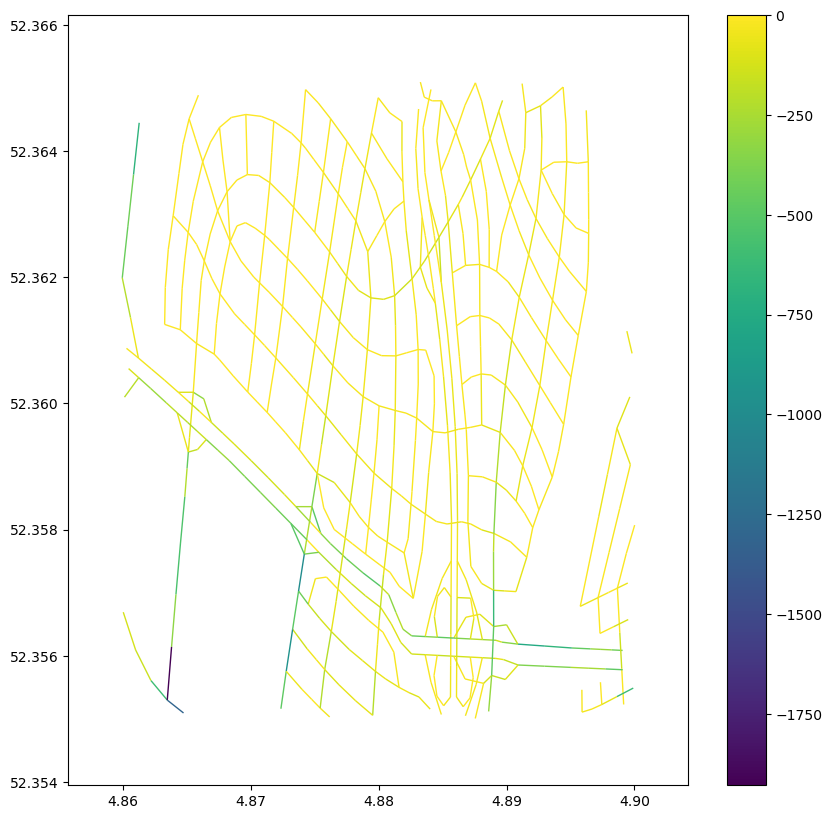

In [17]:
plot_graph(G2_pred_rb, use_weights=True, figsize=(10,10))

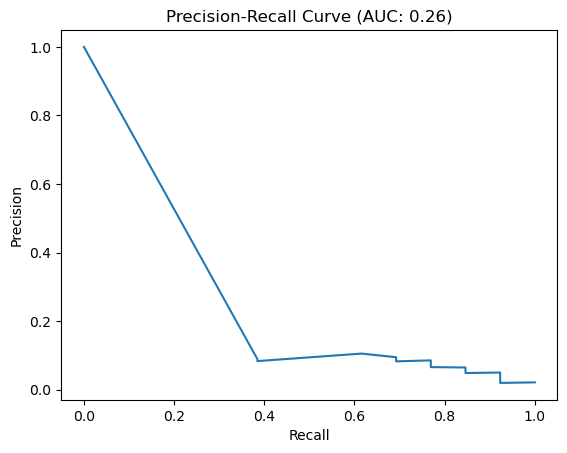

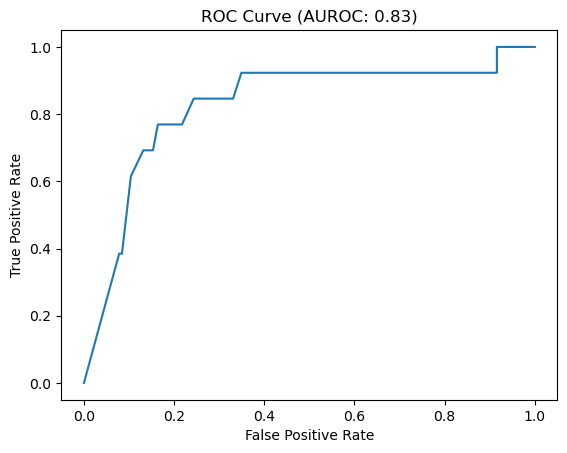

In [18]:
scores_rb = predicted_labels(G2_pred_rb)
p_rb, r_rb, ts_rb, pr_auc_rb = PRCurve(groundtruth_labels(G1, G2), scores_rb, log_scale=False)
tpr_rb, fpr_rb, auroc_rb = ROCCurve(groundtruth_labels(G1, G2), scores_rb)

### HMM Based Change Detector

In [19]:
no_matches_hmm = hmm_det.no_matches

NameError: name 'hmm_det' is not defined

In [ ]:
import random
T_sample = random.sample(T2['T'], k=500)

In [ ]:
from models.hmm import HMMChangeDetector

hmm_det = HMMChangeDetector(G1, use_latlon=False, obs_noise=50)

In [ ]:
still_nomatch = []
for idx in range(len(no_matches_hmm)):
# idx=0
    print(f'{idx}/{len(no_matches_hmm)}')
    path = hmm_det.map_match_trajectory(no_matches_hmm[idx])
#     print(path)
    if len(path) == 0:
        still_nomatch.append(no_matches_hmm[idx])
#     plot_graph(snapshot_to_nxgraph(G1, [no_matches_hmm[idx]]), figsize=(10,10))

In [ ]:
idx=0
path = hmm_det.map_match_trajectory(no_matches_hmm[idx])
print(path)
plot_graph(snapshot_to_nxgraph(G1, [no_matches_hmm[idx]]), figsize=(10,10))

In [ ]:
len(still_nomatch)

In [ ]:
idx=1
path = hmm_det.map_match_trajectory(T_sample[idx])
print(path)
plot_graph(snapshot_to_nxgraph(G1, [T_sample[idx]]), figsize=(10,10))

In [ ]:
plot_graph(traj_to_nxgraph(T_sample), figsize=(10,10))

In [21]:
from models.hmm import HMMChangeDetector

hmm_det = HMMChangeDetector(G1, use_latlon=False)
G2_pred_hmm = hmm_det.forward(T2['T'])

Map matching trajectory: 2038/2039: : 2039it [47:29,  1.40s/it]

No matches for 0/2039 trajectories


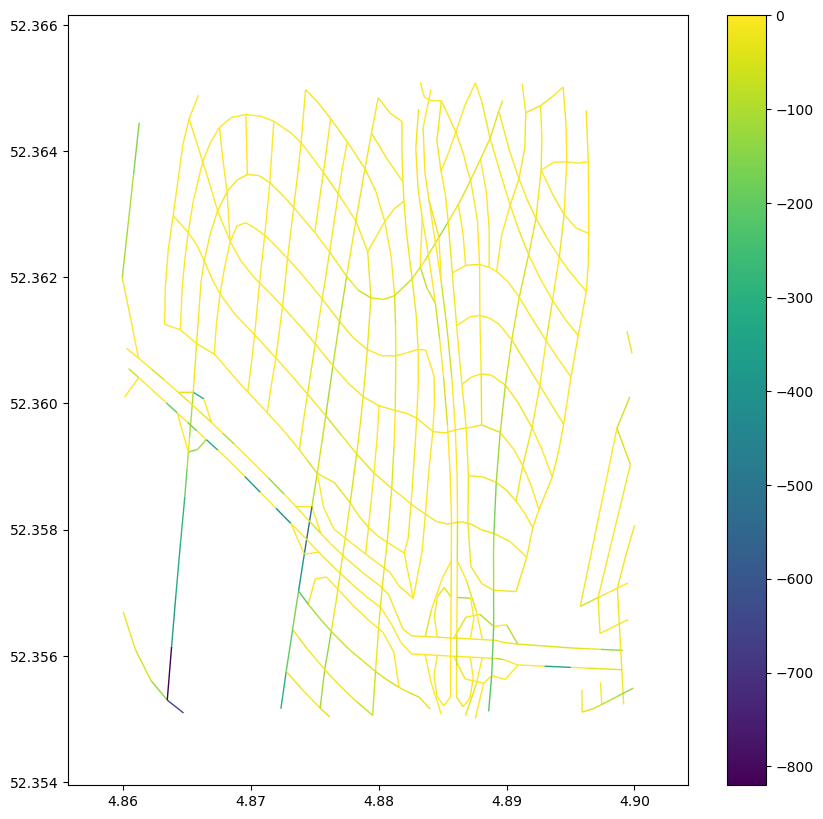

In [22]:
plot_graph(G2_pred_hmm, use_weights=True, figsize=(10,10))

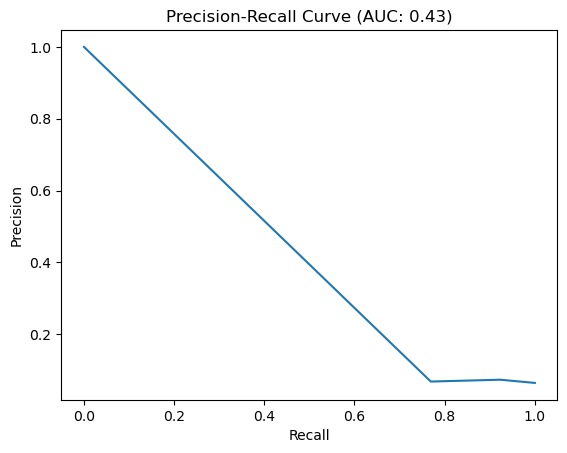

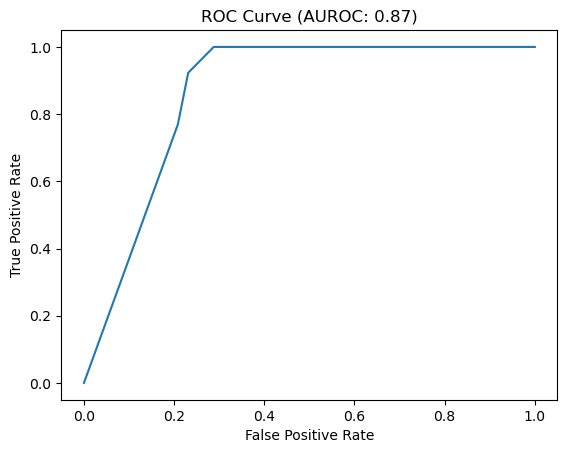

In [23]:
scores_hmm = predicted_labels(G2_pred_hmm)
p_hmm, r_hmm, ts_hmm, pr_auc_hmm = PRCurve(groundtruth_labels(G1, G2), scores_hmm, log_scale=False)
tpr_hmm, fpr_hmm, auroc_hmm = ROCCurve(groundtruth_labels(G1, G2), scores_hmm)

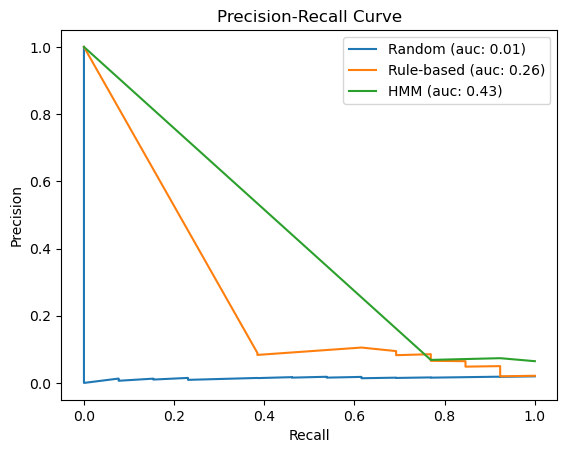

In [24]:
PRCombine(ps=[p_rand, p_rb, p_hmm], rs=[r_rand, r_rb, r_hmm], aucs=[pr_auc_rand, pr_auc_rb, pr_auc_hmm],
          labels=['Random', 'Rule-based', 'HMM'], log_scale=False)

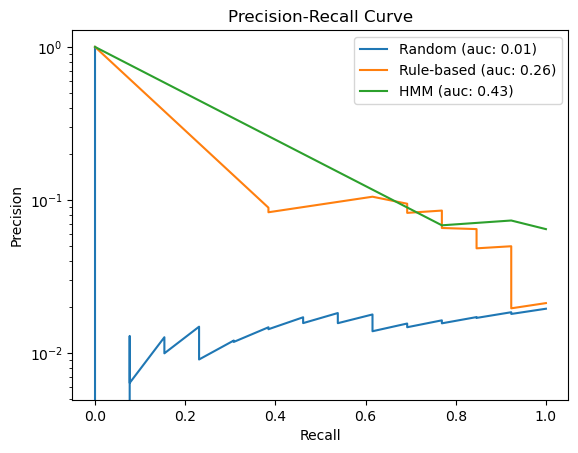

In [27]:
PRCombine(ps=[p_rand, p_rb, p_hmm], rs=[r_rand, r_rb, r_hmm], aucs=[pr_auc_rand, pr_auc_rb, pr_auc_hmm],
          labels=['Random', 'Rule-based', 'HMM'], log_scale=True)

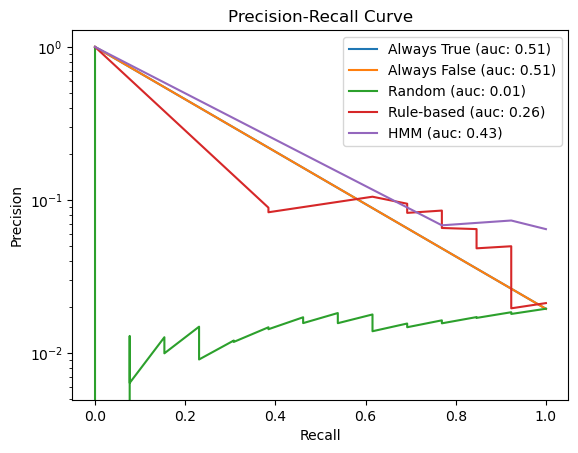

In [25]:
PRCombine(ps=[p_true, p_false, p_rand, p_rb, p_hmm], rs=[r_true, r_false, r_rand, r_rb, r_hmm],
          aucs=[pr_auc_true, pr_auc_false, pr_auc_rand, pr_auc_rb, pr_auc_hmm], 
          labels=['Always True', 'Always False', 'Random', 'Rule-based', 'HMM'])

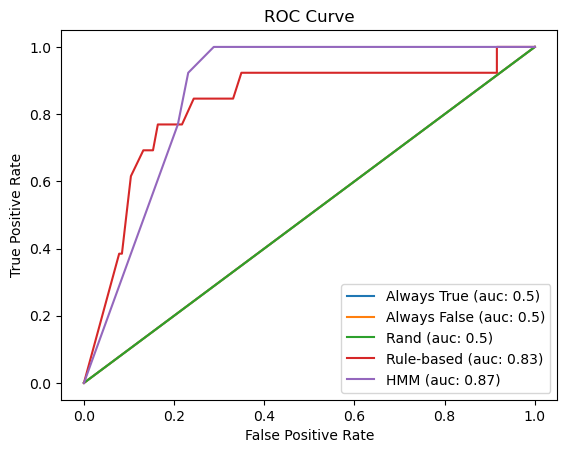

In [26]:
ROCCombine([fpr_true, fpr_false, fpr_rand, fpr_rb, fpr_hmm], 
           [tpr_true, tpr_false, tpr_rand, tpr_rb, tpr_hmm], 
           [auroc_true, auroc_false, auroc_rand, auroc_rb, auroc_hmm], 
           ['Always True', 'Always False', 'Rand', 'Rule-based', 'HMM'])

In [20]:
def evaluate_predictions(G2_pred, targets):
    num_edges = len([edge for edge in G2_pred.edges])
    
    edge_weights = nx.get_edge_attributes(G2_pred, 'weight')
    
    # Get number of roads with no matches
    nomatch_edges = [edge for edge, weight in edge_weights.items() if weight == 0]
    num_nomatch_roads = len(nomatch_edges)
    
    # Get number of roads that are actually removed
    removed_edges = [edge for edge, weight in targets.items() if weight == 1]
    num_removed_roads = len(removed_edges)
    
    print(f'# of roads with no matches: {num_nomatch_roads}/{num_edges} ({round((num_nomatch_roads/num_edges)*100,2)}%)')
    print(f'# of roads actually removed: {num_removed_roads}/{num_edges} ({round((num_removed_roads/num_edges)*100,2)}%)')
    
    # Get number of removed roads that were matched with trajectories
    removed_edges_weights = [edge_weights[edge] for edge in removed_edges]
    num_removed_edges_w_weights = len([weight for weight in removed_edges_weights if weight != 0])
    print(f'# of removed roads with non-zero weight: {num_removed_edges_w_weights}/{num_edges} ({round((num_removed_edges_w_weights/num_edges)*100,2)}%)')
    
    # Get average weight of removed roads
    avg_removed_road_weight = np.mean(removed_edges_weights)
    print(f'Average edge weight of removed segments: {avg_removed_road_weight}')
    
    # Get average weight of non removed roads
    nonremoved_edges_weights = [weight for edge, weight in edge_weights.items() if edge not in removed_edges]
    avg_nonremoved_road_weight = np.mean(nonremoved_edges_weights)
    print(f'Average edge weight of remaining segments: {avg_nonremoved_road_weight}')
    
    # Get number of non removed roads that weren't matched
    nonremoved_nomatch_edges = [weight for edge, weight in edge_weights.items() if edge not in removed_edges and weight == 0]
    num_nonremoved_nomatch_edges = len(nonremoved_nomatch_edges)
    print(f"# of non removed roads that weren't matched: {num_nonremoved_nomatch_edges}/{num_edges} ({round((num_nonremoved_nomatch_edges/num_edges)*100,2)}%)")
    
    
    
evaluate_predictions(G2_pred_hmm, groundtruth_labels(G1,G2))

NameError: name 'G2_pred_hmm' is not defined

In [ ]:
evaluate_predictions(G2_pred_rb, groundtruth_labels(G1,G2))

In [ ]:
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Image

def save_maps(G1, G2, T2, G2_pred, figsize=(10,10)):
    if not os.path.exists('./images'):
        os.mkdir('./images')
    
    G1_d, G12_d, G2_d, G21_d = compare_snapshots(G1,G2)
    plot_graph(G12_d, show_img=False, figsize=figsize)
    plt.savefig('./images/G2_changes.png')
    
    plot_graph(G2_pred, show_img=False, use_weights=True, figsize=(figsize[0]+2, figsize[1]))
    plt.savefig('./images/G2_pred.png')
    
    plot_graph(snapshot_to_nxgraph(G1,T2['T']), show_img=False, figsize=figsize)
    plt.savefig('./images/G1T2.png')
    

save_maps(G1, G2, T2, G2_pred_rb)

In [ ]:
@interact
def compare_maps(file=os.listdir('./images/')):
    display(Image('./images/'+file))


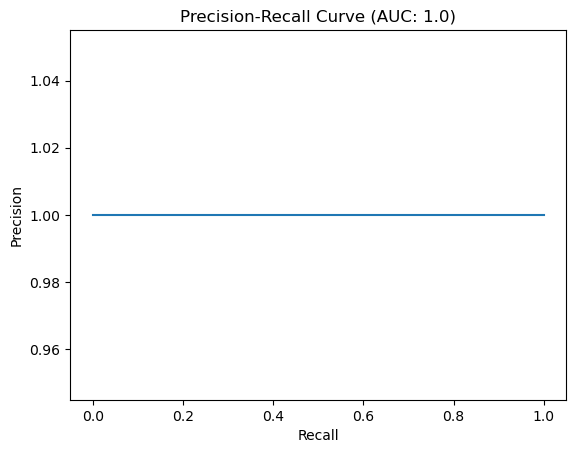

In [29]:
class GoldStandard(object):
    def __init__(self, G1, G2):
        self.G1 = G1.copy()
        self.G1_edges = set(G1.edges)
        self.G2_edges = set(G2.edges)
        
    def forward(self, T2):
        removed_edges = list(self.G1_edges.difference(self.G2_edges))
        
        G_edge_scores = {}
        for edge in removed_edges:
            G_edge_scores[edge] = 0.2
        
        remaining_edges = list(self.G1_edges.intersection(self.G2_edges))
        
        for edge in remaining_edges:
            G_edge_scores[edge] = 0.0
        
        nx.set_edge_attributes(self.G1, G_edge_scores, name='weight')
        return self.G1

gs_det = GoldStandard(G1,G2)
G2_pred_gs = gs_det.forward(T2['T'])
scores_gs = predicted_labels(G2_pred_gs)
p_gs, r_gs, ts_gs, pr_auc_gs = PRCurve(groundtruth_labels(G1, G2), scores_gs, log_scale=False)

In [ ]:
scores_gs

In [ ]:
plot_graph(gs_det.G1, figsize=(10,10), show_labels=True, use_weights=True)

In [ ]:
gs_det.G1.nodes(data=True)

In [ ]:
list(zip(groundtruth_labels(G1,G2).items(), scores_hmm.items()))

In [ ]:
plot_graph(hmm_det.G1, figsize=(10,10), show_labels=True, use_weights=True)

3
136


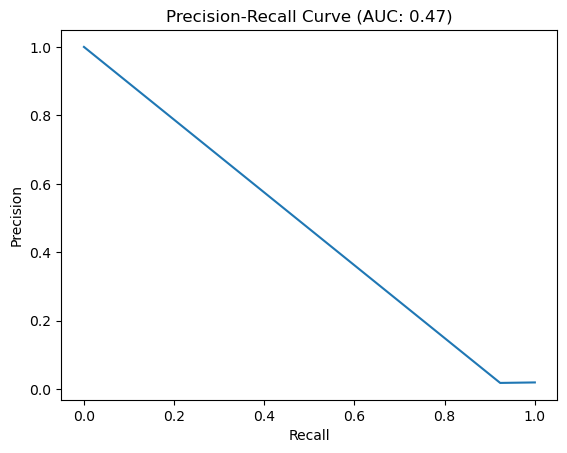

In [38]:
matched_but_removed = []
not_traversed_but_remaining = []
removed_edges = []
for i in list(zip(groundtruth_labels(G1,G2).items(), scores_hmm.items())):
    gt_val = i[0][1]
    pred_val = i[1][1]
    if gt_val == 1 and pred_val != 0:
        matched_but_removed.append(i[0][0])
    if gt_val == 0 and pred_val == 0:
        not_traversed_but_remaining.append(i[0][0])
    if gt_val == 1:
        removed_edges.append(i[0][0])
        
        
print(len(matched_but_removed))
print(len(not_traversed_but_remaining))


edges = G1.edges

scores_matched = {}
for edge in edges:
    if edge in matched_but_removed:
        scores_matched[edge] = -1
    elif edge in removed_edges:
        scores_matched[edge] = 0
    else:
        scores_matched[edge] = 0
        
        

p_matched, r_matched, ts_matched, pr_auc_matched = PRCurve(groundtruth_labels(G1, G2), scores_matched, log_scale=False)

3
136


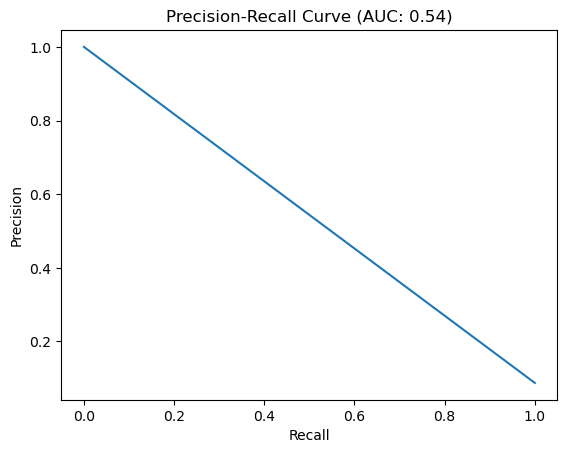

In [49]:
# Everything that was not matched but remaining gets a score of 0 (removed)
# Everything that was actually removed also gets score of 0 (removed)
# Everything else is classified as not removed (so a low score/many matched trajectories)

matched_but_removed = []
not_traversed_but_remaining = []
removed_edges = []
for i in list(zip(groundtruth_labels(G1,G2).items(), scores_hmm.items())):
    gt_val = i[0][1]
    pred_val = i[1][1]
    if gt_val == 1 and pred_val != 0:
        matched_but_removed.append(i[0][0])
    if gt_val == 0 and pred_val == 0:
        not_traversed_but_remaining.append(i[0][0])
    if gt_val == 1:
        removed_edges.append(i[0][0])
        
        
print(len(matched_but_removed))
print(len(not_traversed_but_remaining))


edges = G1.edges

scores_matched = {}
for edge in edges:
    if edge in not_traversed_but_remaining:
        scores_matched[edge] = 0
    elif edge in removed_edges:
        scores_matched[edge] = 0
    else:
        scores_matched[edge] = -1
        
        

scores_matched = {edge: scores_matched[edge] for edge in sorted(scores_matched)}

p_matched, r_matched, ts_matched, pr_auc_matched = PRCurve(groundtruth_labels(G1, G2), scores_matched, log_scale=False)